In [23]:
import torch
from torch import nn
import matplotlib.pyplot as plt
torch.__version__

'2.1.0+cu121'

In [24]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

print(X.shape)

print("Y")
print(y.shape)

torch.Size([50, 1])
Y
torch.Size([50, 1])


In [25]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split],y[:train_split]
X_test, y_test = X[train_split:],y[train_split:]

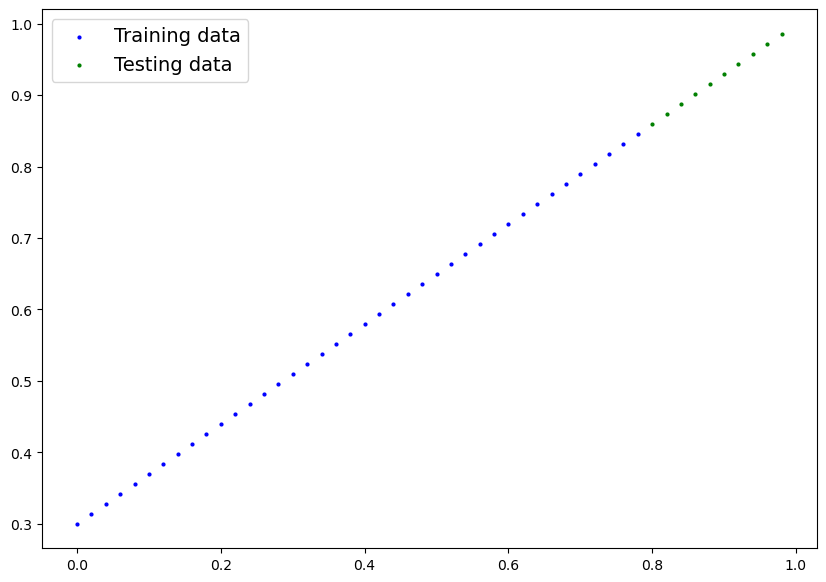

In [26]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

plot_predictions();

In [27]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,dtype=torch.float,requires_grad=True))
        self.bias = nn.Parameter(torch.randn(1,dtype=torch.float,requires_grad=True))
    def forward(self,x:torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [28]:
# Set manual seed since nn.Parameter are randomly initialzied
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegression()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [29]:
# List named parameters 
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [30]:
# Make predictions with model
with torch.inference_mode(): 
    y_preds = model_0(X_test)

In [31]:
print(nn.L1Loss)
print(torch.optim.SGD)

<class 'torch.nn.modules.loss.L1Loss'>
<class 'torch.optim.sgd.SGD'>


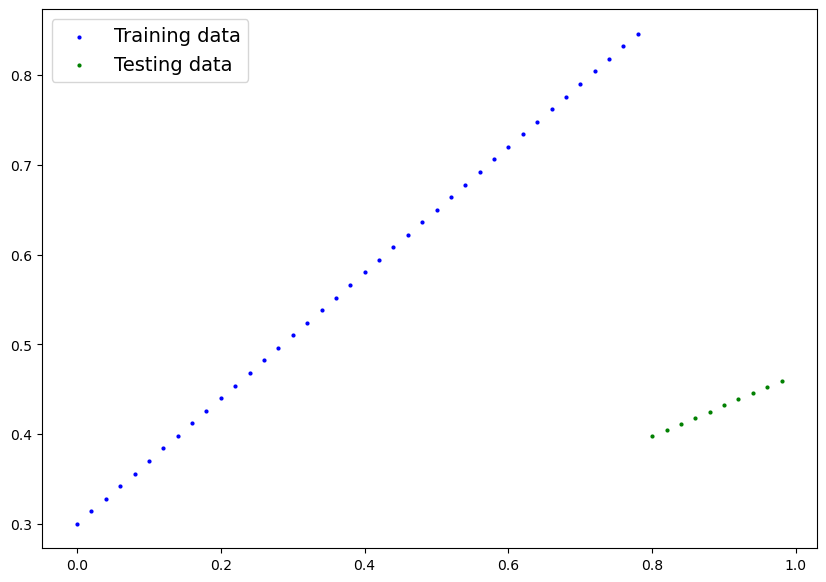

In [32]:
plot_predictions(X_train,y_train,X_test,y_preds)

In [33]:
torch.manual_seed(42)


# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []
model = LinearRegression()
loss_fn = torch.nn.L1Loss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

epochs =100
for epoch in range(epochs):
     # Zero your gradients for every batch!
    # Set in train mode
    model.train()
    # Make gradient 0 for each batch
    optimizer.zero_grad()
    # Get output
    output = model(X_train)
    # Get the loss
    loss = loss_fn(output, y_train)
    #Backpropogate the loss
    loss.backward()
    # adjust gradient
    optimizer.step()
    #set to evaluation mode
    model.eval()
    with torch.inference_mode():
        y_pred = model(X_test)
        test_loss = loss_fn(y_pred, y_test.type(torch.float)) 
         # Print out what's happening
        if epoch % 10 == 0:
                epoch_count.append(epoch)
                train_loss_values.append(loss.detach().numpy())
                test_loss_values.append(test_loss.detach().numpy())
                print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")



    



Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.4931890368461609 
Epoch: 10 | MAE Train Loss: 0.2652062475681305 | MAE Test Loss: 0.42954808473587036 
Epoch: 20 | MAE Train Loss: 0.17354421317577362 | MAE Test Loss: 0.3196183741092682 
Epoch: 30 | MAE Train Loss: 0.07658421993255615 | MAE Test Loss: 0.19600041210651398 
Epoch: 40 | MAE Train Loss: 0.049822837114334106 | MAE Test Loss: 0.1047191172838211 
Epoch: 50 | MAE Train Loss: 0.05188112333416939 | MAE Test Loss: 0.07652740925550461 
Epoch: 60 | MAE Train Loss: 0.04550507664680481 | MAE Test Loss: 0.08845251053571701 
Epoch: 70 | MAE Train Loss: 0.04110615700483322 | MAE Test Loss: 0.09915140271186829 
Epoch: 80 | MAE Train Loss: 0.0379766970872879 | MAE Test Loss: 0.09460471570491791 
Epoch: 90 | MAE Train Loss: 0.034372203052043915 | MAE Test Loss: 0.08180627971887589 


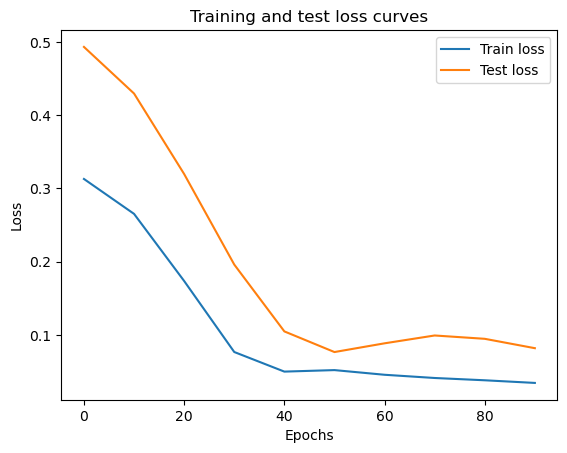

In [34]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [36]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.5466])), ('bias', tensor([0.3654]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


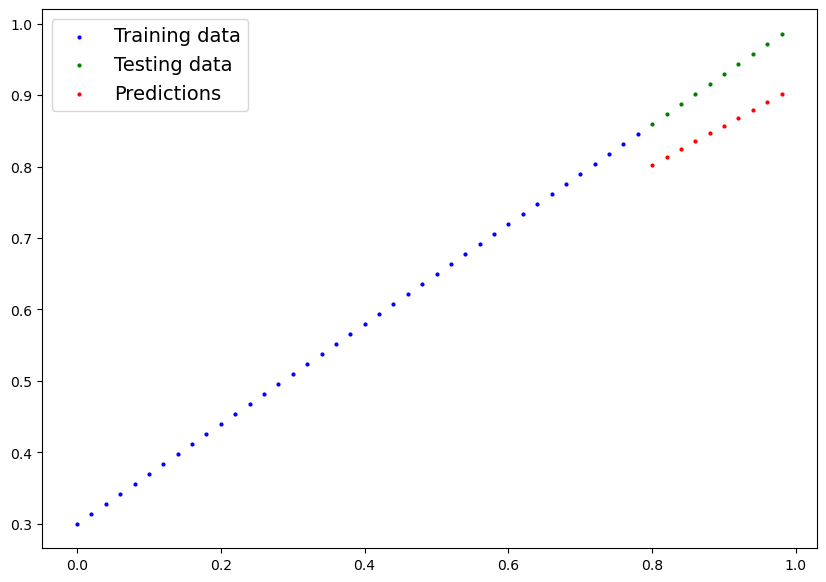

In [38]:
plot_predictions(predictions=y_pred)

In [39]:
# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

Model's state_dict:
weights 	 torch.Size([1])
bias 	 torch.Size([1])
Optimizer's state_dict:
state 	 {0: {'momentum_buffer': tensor([-1.7648])}, 1: {'momentum_buffer': tensor([0.5698])}}
param_groups 	 [{'lr': 0.001, 'momentum': 0.9, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'maximize': False, 'foreach': None, 'differentiable': False, 'params': [0, 1]}]


In [41]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

In [42]:
print(MODEL_SAVE_PATH)

models/01_pytorch_workflow_model_0.pth


In [43]:
# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH) 

Saving model to: models/01_pytorch_workflow_model_0.pth


<generator object Module.parameters at 0x7fb09bb7ace0>


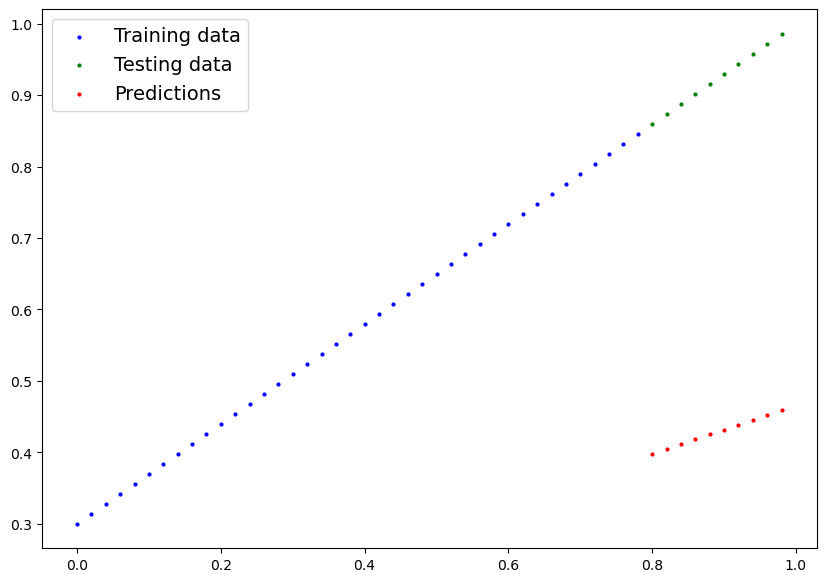

In [45]:
model_1 = LinearRegression()
model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
model_1.eval()
print(model_1.parameters())
with torch.inference_mode():
    y_pred1 = model_1(X_test)

plot_predictions(predictions=y_pred1)

In [46]:
print(model_1.state_dict())

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])
